In [1]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import SmartBrokerEnv
from agents.actor_critic import A2C
from networks.a2c.actor import Actor
from networks.a2c.critic import Critic

import gym
import matplotlib.pyplot as plt
import torch

In [2]:
norm_cols = ['open', 'high', 'low', 'close', f'Volume XRP']
cols = ['date'] + norm_cols
batch_dur = 30
env = SmartBrokerEnv(
    batch_dur=batch_dur,
    df_info={
        'start_date': '2021-01-01',
        'end_date': '2021-05-01',
        'norm_cols': norm_cols,
        'cols': cols,
    },
    portfolio={

    },
)

/Users/vinay/miniforge3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/vinay/code/git/smart-broker/notebooks/../environment.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['rolling_price'] = self.df[self.price_typ].rolling(self.roll_period).sum()
/Users/vinay/miniforge3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [3]:
actor_model = Actor(
    state_dim=batch_dur*3+3,
    action_dim=3,
)
critic_model = Critic(state_dim=batch_dur*3+3)
a2c = A2C(
    env=env, 
    actor=actor_model,
    critic=critic_model,
    n_actns=3,
    actor_optmz=torch.optim.Adam(actor_model.parameters(), lr=0.001),
    critic_optmz=torch.optim.Adam(critic_model.parameters(), lr=0.001),
    hyprprms={
        'gamma': 0.9995,
    },
    log_freq=25,
)

In [4]:
a2c.run(1000)


Ep: 0 | L: 0.255 | R: 63772.38 | R.Avg.R: 63772.38 | P: 154 | R.Avg P: 154 | B: 131 | R.Avg B: 131, N_Units: 13362
Ep: 25 | L: 0.145 | R: 39375.37 | R.Avg.R: 43860.40120000001 | P: 65 | R.Avg P: 75 | B: 81 | R.Avg B: 91, N_Units: 9870
Ep: 50 | L: 0.067 | R: 26258.1 | R.Avg.R: 47337.592000000004 | P: 3 | R.Avg P: 75 | B: 54 | R.Avg B: 93, N_Units: 5723
Ep: 75 | L: 0.129 | R: 63139.69 | R.Avg.R: 44619.8096 | P: 117 | R.Avg P: 72 | B: 130 | R.Avg B: 94, N_Units: 9651

## Visualizations

### Traning 

Text(0.5, 1.0, 'Average units held per episode')

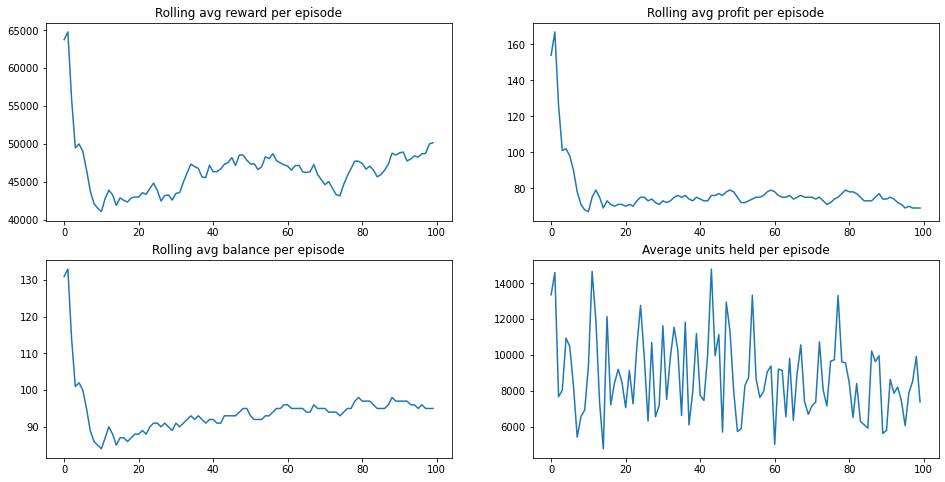

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))
r_avg_rewards = []
r_avg_profits = []
r_avg_bal = []
avg_units_held = []

for _, log in a2c.logs.items():
    r_avg_rewards.append(log['r_avg_reward'])
    r_avg_profits.append(log['r_avg_profit'])
    r_avg_bal.append(log['r_avg_bal'])
    avg_units_held.append(log['avg_units_held'])

ax[0][0].plot(range(len(r_avg_rewards)), r_avg_rewards)
ax[0][0].set_title('Rolling avg reward per episode')

ax[0][1].plot(range(len(r_avg_profits)), r_avg_profits)
ax[0][1].set_title('Rolling avg profit per episode')

ax[1][0].plot(range(len(r_avg_bal)), r_avg_bal)
ax[1][0].set_title('Rolling avg balance per episode')

ax[1][1].plot(range(len(avg_units_held)), avg_units_held)
ax[1][1].set_title('Average units held per episode')